In [1]:
%pip install mplcyberpunk

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import mplcyberpunk
# Set cyberpunk style
plt.style.use("cyberpunk")

In [4]:
SD= pd.read_csv("./Ops Case Study Dataset - Sample DB Data (2).csv")

In [5]:
SD.head()

,Patient Name,Provider Name,from_date_range,cpt_codes
0,Lucas Smith,Aiden King,2024-07-03,"{97110,97112,97140,97010}"
1,Lucas Smith,Charlotte Williams,2024-07-11,"{97112,97010,97140,97110}"
2,Lucas Smith,Charlotte Williams,2024-07-17,"{97110,97140,97112,97010}"
3,Lucas Smith,Julian Lee,2024-07-27,"{97140,97110,97112,97010}"
4,Lucas Smith,Aiden King,2024-08-07,"{97010,97110,97112,97140}"


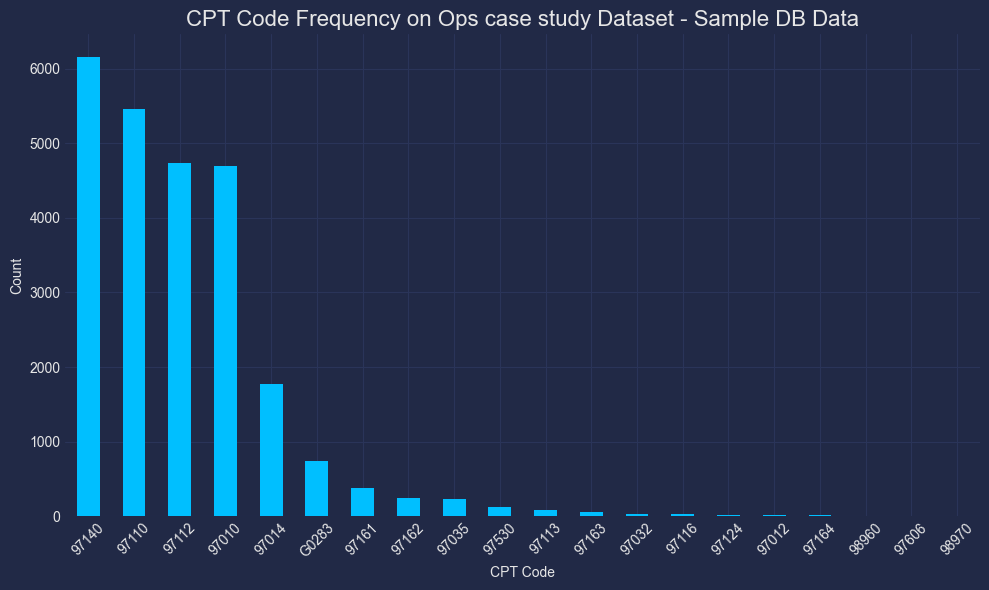

In [7]:
# Explode the cpt_codes column to get individual codes per row
SD_exploded = SD.copy()
SD_exploded['cpt_codes'] = SD_exploded['cpt_codes'].str.strip('{}').str.split(',')
SD_exploded = SD_exploded.explode('cpt_codes')
SD_exploded['cpt_codes'] = SD_exploded['cpt_codes'].str.strip()

# Frequency count
cpt_freq = SD_exploded['cpt_codes'].value_counts()

# Plot with cyberpunk glow effect
fig, ax = plt.subplots(figsize=(10,6))
cpt_freq.plot(kind='bar', color='deepskyblue', ax=ax)
ax.set_title('CPT Code Frequency on Ops case study Dataset - Sample DB Data', fontsize=16)
ax.set_xlabel('CPT Code')
ax.set_ylabel('Count')
plt.xticks(rotation=45)
mplcyberpunk.add_glow_effects(ax)
plt.tight_layout()
plt.show()

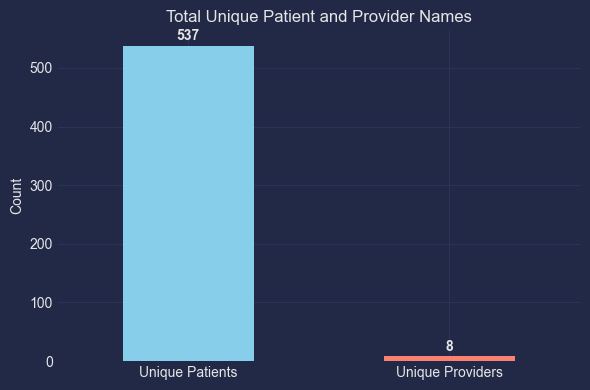

In [9]:
unique_patient_count = SD['Patient Name'].nunique()
unique_provider_count = SD['Provider Name'].nunique()

# Prepare data for bar plot
counts = pd.Series([unique_patient_count, unique_provider_count], index=['Unique Patients', 'Unique Providers'])

plt.figure(figsize=(6,4))
ax = counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.ylabel('Count')
plt.title('Total Unique Patient and Provider Names')
plt.xticks(rotation=0)
plt.tight_layout()

# Add numbers above bars
for i, v in enumerate(counts):
    ax.text(i, v + 5, str(v), ha='center', va='bottom', fontweight='bold')

plt.show()

In [11]:
SD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6482 entries, 0 to 6481
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Patient Name     6482 non-null   object
 1   Provider Name    6482 non-null   object
 2   from_date_range  6482 non-null   object
 3   cpt_codes        6482 non-null   object
dtypes: object(4)
memory usage: 202.7+ KB


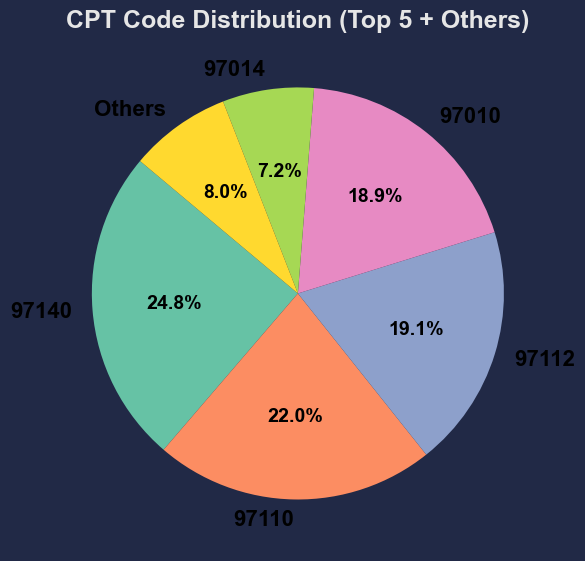

In [41]:
plt.figure(figsize=(6,6))  # Reduced height and width
wedges, texts, autotexts = plt.pie(
    sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, textprops={'color':'black', 'fontsize':14}
)
plt.setp(texts, size=16, weight="bold")
plt.setp(autotexts, size=14, weight="bold")
plt.title('CPT Code Distribution (Top 5 + Others)', fontsize=18, weight='bold')
plt.tight_layout()
plt.show()

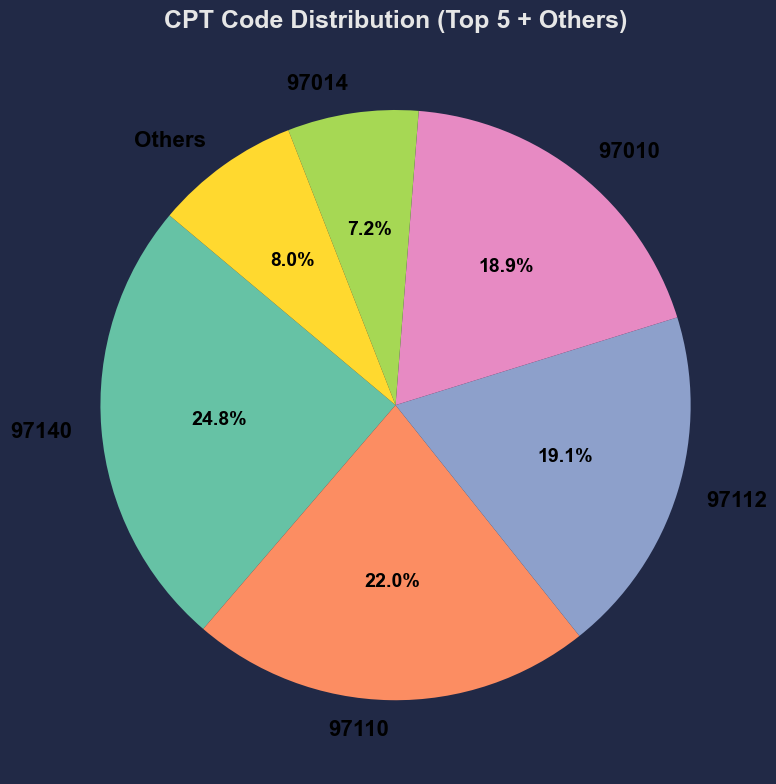

In [14]:
from matplotlib import cm

# Pie chart of CPT code distribution using SD_exploded (top 5 codes, rest as 'Others')

cpt_pie_counts = SD_exploded['cpt_codes'].value_counts()
top_n = 5
top_codes = cpt_pie_counts.nlargest(top_n)
others_count = cpt_pie_counts.iloc[top_n:].sum()

labels = list(top_codes.index) + ['Others']
sizes = list(top_codes.values) + [others_count]

# Use a color palette for better visibility
colors = cm.Set2(range(len(labels)))

plt.figure(figsize=(8,8))
wedges, texts, autotexts = plt.pie(
    sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, textprops={'color':'black', 'fontsize':14}
)
plt.setp(texts, size=16, weight="bold")
plt.setp(autotexts, size=14, weight="bold")
plt.title('CPT Code Distribution (Top 5 + Others)', fontsize=18, weight='bold')
plt.tight_layout()
plt.show()

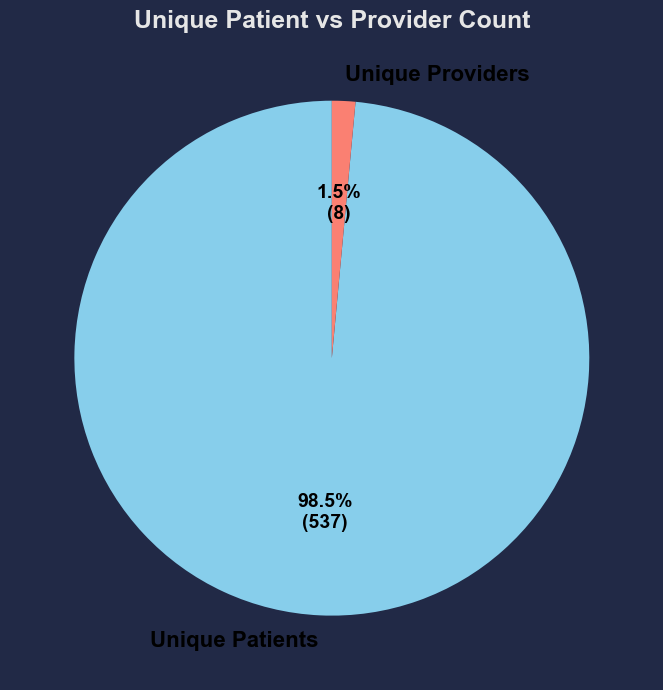

In [16]:
# Custom function for autopct to include both percentage and count
def autopct_format(pct, all_values):
    absolute = int(round(pct / 100. * sum(all_values)))
    return f"{pct:.1f}%\n({absolute})"

plt.figure(figsize=(7,7))
wedges, texts, autotexts = plt.pie(
    unique_counts,
    labels=unique_counts.index,
    autopct=lambda pct: autopct_format(pct, unique_counts),
    startangle=90,
    colors=['skyblue', 'salmon'],
    textprops={'color':'black', 'fontsize':14}
)
plt.setp(texts, size=16, weight="bold")
plt.setp(autotexts, size=14, weight="bold")
plt.title('Unique Patient vs Provider Count', fontsize=18, weight='bold')
plt.tight_layout()
plt.show()

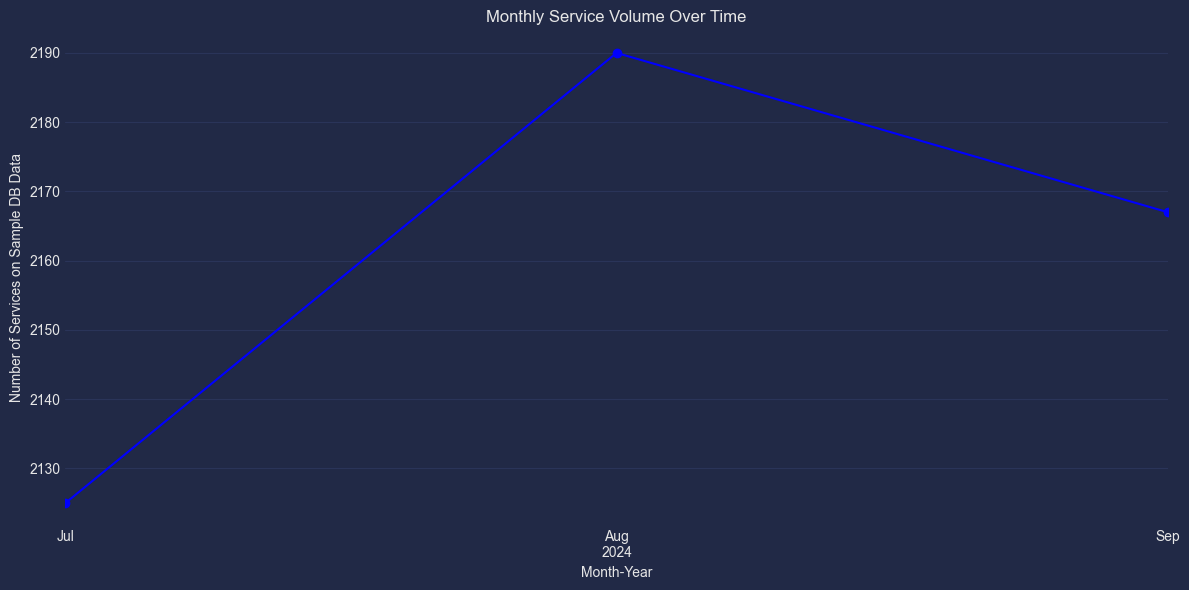

In [21]:
# Convert 'from_date_range' to datetime
SD['Date of Service'] = pd.to_datetime(SD['from_date_range'], errors='coerce')

# Group by month and year, count number of services
monthly_counts = SD.groupby(SD['Date of Service'].dt.to_period('M')).size()

# Plot forecast type graph (line plot)
plt.figure(figsize=(12,6))
monthly_counts.plot(kind='line', marker='o', color='blue')
plt.xlabel('Month-Year')
plt.ylabel('Number of Services on Sample DB Data')
plt.title('Monthly Service Volume Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

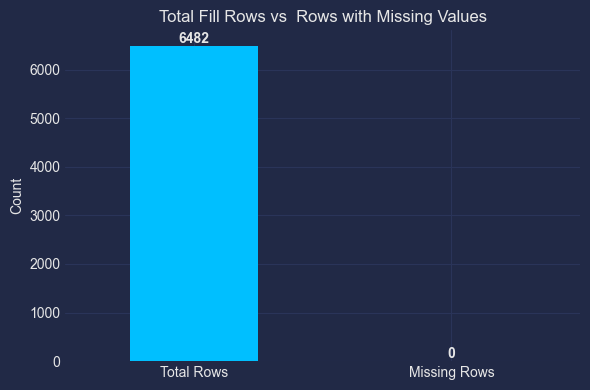

In [24]:
# Bar plot: Total rows vs rows with any missing value
total_rows = len(SD)
missing_rows = missing_rows_count

row_counts = pd.Series([total_rows, missing_rows], index=['Total Rows', 'Missing Rows'])

plt.figure(figsize=(6,4))
ax = row_counts.plot(kind='bar', color=['deepskyblue', 'orange'])
plt.ylabel('Count')
plt.title('Total Fill Rows vs  Rows with Missing Values')
plt.xticks(rotation=0)

# Add numbers above bars
for i, v in enumerate(row_counts):
    ax.text(i, v + 0.5, str(v), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

In [35]:
# Convert 'Date of Service' to datetime
ER=pd.read_csv("./Ops Case Study Dataset - Sample EHR Data (2).csv")

In [36]:
ER.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25956 entries, 0 to 25955
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Patient Name     25956 non-null  object
 1   Provider Name    25954 non-null  object
 2   Date of Service  25954 non-null  object
 3   CPT Code         25954 non-null  object
dtypes: object(4)
memory usage: 811.3+ KB


In [ ]:
# Explode the CPT Code column for ER dataset to get individual codes per row


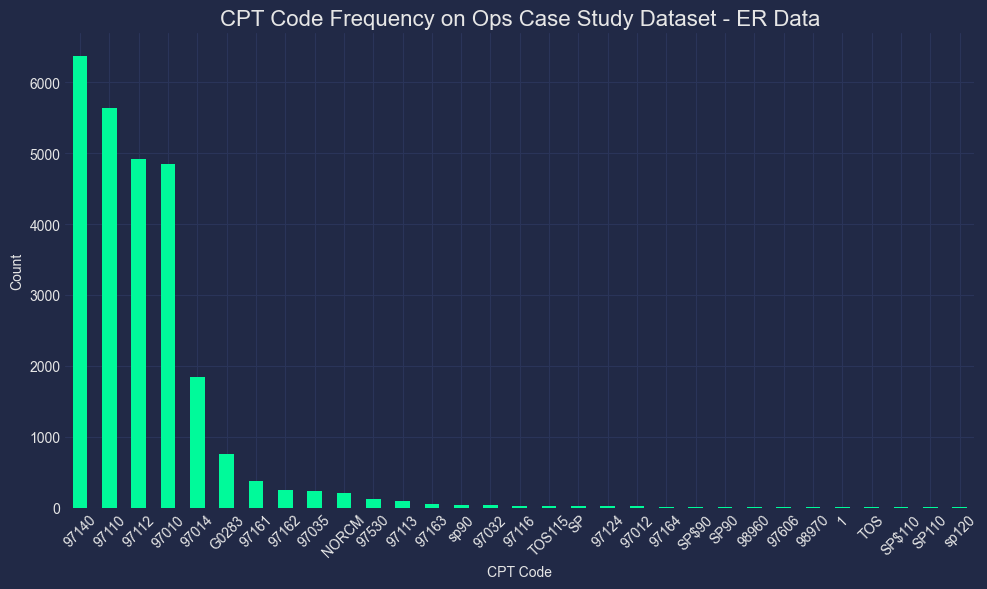

In [37]:
ER_exploded_graph = ER.dropna(subset=['CPT Code']).copy()
ER_exploded_graph['CPT Code'] = ER_exploded_graph['CPT Code'].str.strip('{}').str.split(',')
ER_exploded_graph = ER_exploded_graph.explode('CPT Code')
ER_exploded_graph['CPT Code'] = ER_exploded_graph['CPT Code'].str.strip()

# Frequency count
cpt_freq_ER_graph = ER_exploded_graph['CPT Code'].value_counts()

# Plot with cyberpunk glow effect
fig, ax = plt.subplots(figsize=(10,6))
cpt_freq_ER_graph.plot(kind='bar', color='mediumspringgreen', ax=ax)
ax.set_title('CPT Code Frequency on Ops Case Study Dataset - ER Data', fontsize=16)
ax.set_xlabel('CPT Code')
ax.set_ylabel('Count')
plt.xticks(rotation=45)
mplcyberpunk.add_glow_effects(ax)
plt.tight_layout()
plt.show()

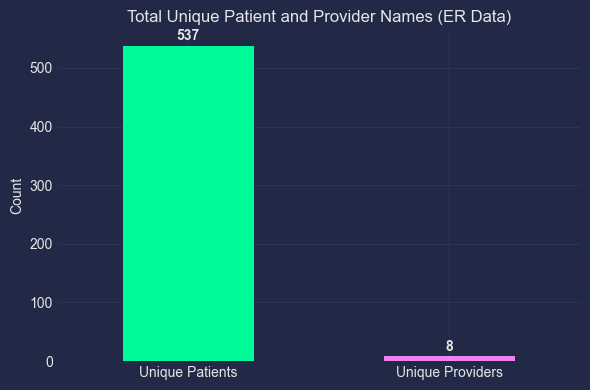

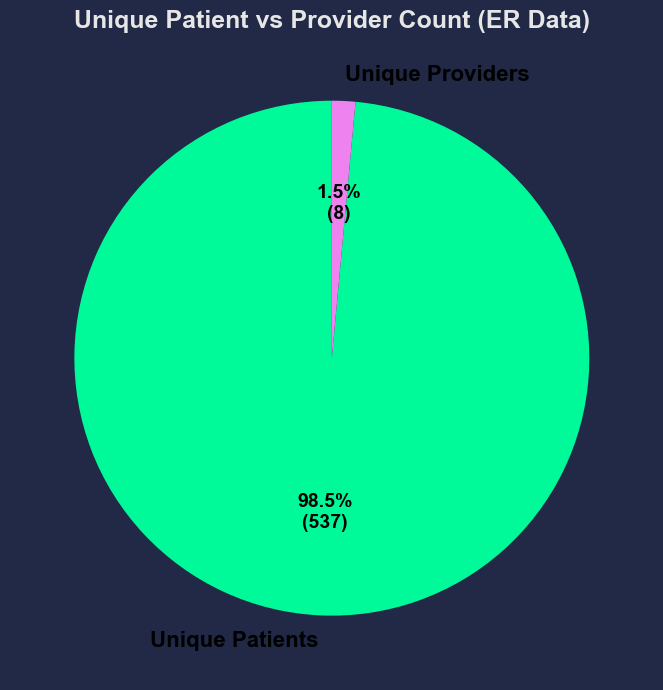

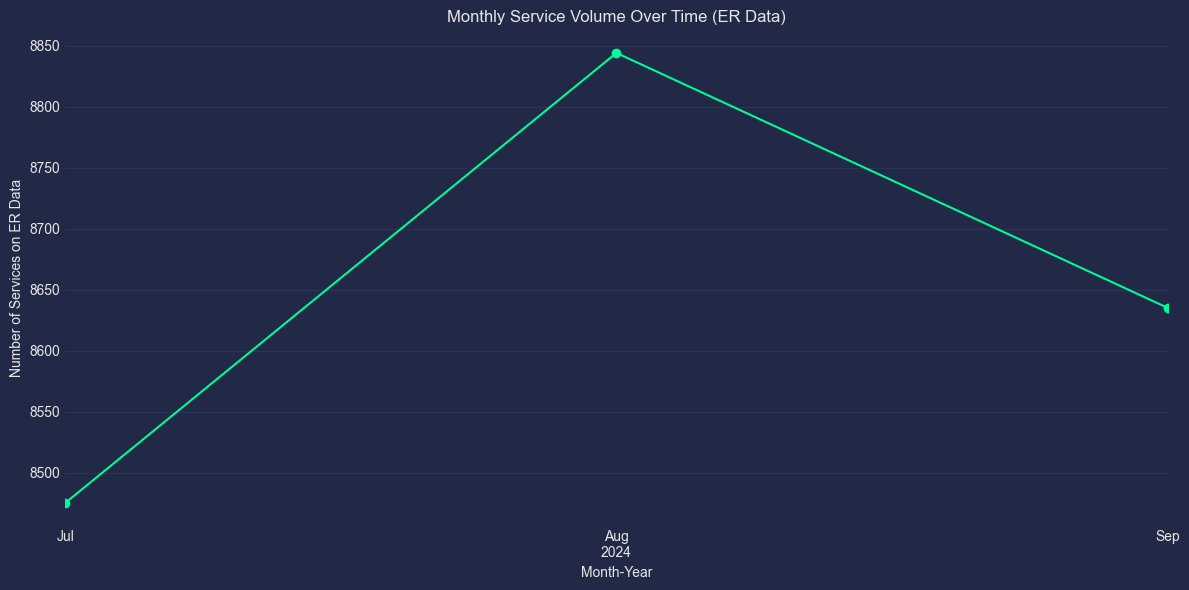

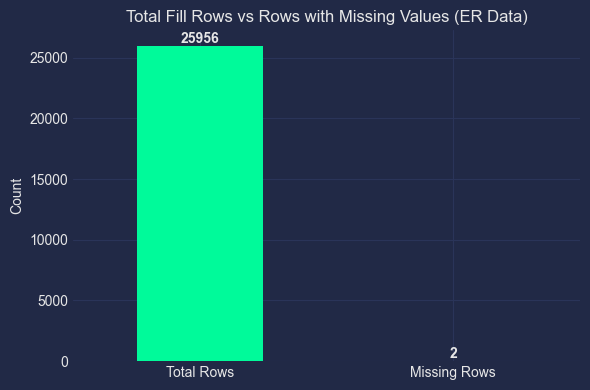

In [38]:
# Bar plot: Unique Patient and Provider count for ER dataset
counts_ER = pd.Series([unique_patient_count_ER, unique_provider_count_ER], index=['Unique Patients', 'Unique Providers'])

plt.figure(figsize=(6,4))
ax = counts_ER.plot(kind='bar', color=['mediumspringgreen', 'violet'])
plt.ylabel('Count')
plt.title('Total Unique Patient and Provider Names (ER Data)')
plt.xticks(rotation=0)
for i, v in enumerate(counts_ER):
    ax.text(i, v + 5, str(v), ha='center', va='bottom', fontweight='bold')
plt.tight_layout()
plt.show()

# Pie chart: Unique Patient vs Provider count for ER dataset
def autopct_format_ER(pct, all_values):
    absolute = int(round(pct / 100. * sum(all_values)))
    return f"{pct:.1f}%\n({absolute})"

plt.figure(figsize=(7,7))
wedges_ER, texts_ER, autotexts_ER = plt.pie(
    counts_ER,
    labels=counts_ER.index,
    autopct=lambda pct: autopct_format_ER(pct, counts_ER),
    startangle=90,
    colors=['mediumspringgreen', 'violet'],
    textprops={'color':'black', 'fontsize':14}
)
plt.setp(texts_ER, size=16, weight="bold")
plt.setp(autotexts_ER, size=14, weight="bold")
plt.title('Unique Patient vs Provider Count (ER Data)', fontsize=18, weight='bold')
plt.tight_layout()
plt.show()

# Line plot: Monthly Service Volume Over Time for ER dataset
ER['Date of Service'] = pd.to_datetime(ER['Date of Service'], errors='coerce')
monthly_counts_ER = ER.groupby(ER['Date of Service'].dt.to_period('M')).size()

plt.figure(figsize=(12,6))
monthly_counts_ER.plot(kind='line', marker='o', color='mediumspringgreen')
plt.xlabel('Month-Year')
plt.ylabel('Number of Services on ER Data')
plt.title('Monthly Service Volume Over Time (ER Data)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Bar plot: Total rows vs rows with any missing value for ER dataset
total_rows_ER = len(ER)
missing_rows_ER = ER.isnull().any(axis=1).sum()
row_counts_ER = pd.Series([total_rows_ER, missing_rows_ER], index=['Total Rows', 'Missing Rows'])

plt.figure(figsize=(6,4))
ax = row_counts_ER.plot(kind='bar', color=['mediumspringgreen', 'orange'])
plt.ylabel('Count')
plt.title('Total Fill Rows vs Rows with Missing Values (ER Data)')
plt.xticks(rotation=0)
for i, v in enumerate(row_counts_ER):
    ax.text(i, v + 0.5, str(v), ha='center', va='bottom', fontweight='bold')
plt.tight_layout()
plt.show()

In [ ]:
# Pie chart of CPT code distribution using ER_exploded (top 5 codes, rest as 'Others')

cpt_pie_counts_ER = ER_exploded_graph['CPT Code'].value_counts()
top_n_ER = 5
top_codes_ER = cpt_pie_counts_ER.nlargest(top_n_ER)
others_count_ER = cpt_pie_counts_ER.iloc[top_n_ER:].sum()

labels_ER = list(top_codes_ER.index) + ['Others']
sizes_ER = list(top_codes_ER.values) + [others_count_ER]

# Use a different color palette for ER dataset
colors_ER = cm.Paired(range(len(labels_ER)))

plt.figure(figsize=(8,8))
wedges_ER, texts_ER, autotexts_ER = plt.pie(
    sizes_ER, labels=labels_ER, autopct='%1.1f%%', startangle=140, colors=colors_ER, textprops={'color':'black', 'fontsize':14}
)
plt.setp(texts_ER, size=16, weight="bold")
plt.setp(autotexts_ER, size=14, weight="bold")
plt.title('CPT Code Distribution (Top 5 + Others) - ER Data', fontsize=18, weight='bold')
plt.tight_layout()

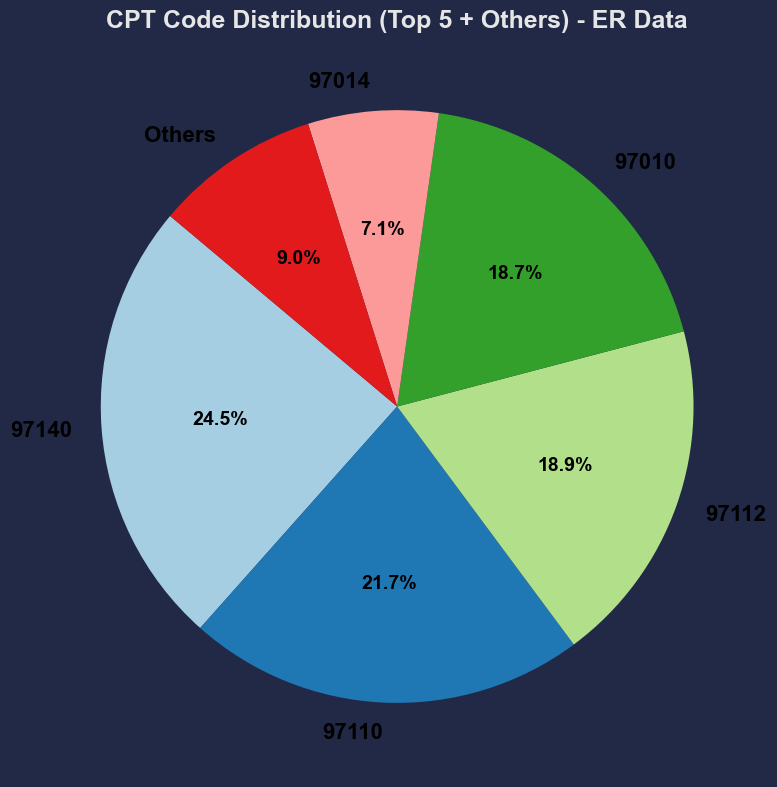

In [42]:

cpt_pie_counts_ER = ER_exploded_graph['CPT Code'].value_counts()
top_n_ER = 5
top_codes_ER = cpt_pie_counts_ER.nlargest(top_n_ER)
others_count_ER = cpt_pie_counts_ER.iloc[top_n_ER:].sum()

labels_ER = list(top_codes_ER.index) + ['Others']
sizes_ER = list(top_codes_ER.values) + [others_count_ER]

# Use a different color palette for ER dataset
colors_ER = cm.Paired(range(len(labels_ER)))

plt.figure(figsize=(8,8))
wedges_ER, texts_ER, autotexts_ER = plt.pie(
    sizes_ER, labels=labels_ER, autopct='%1.1f%%', startangle=140, colors=colors_ER, textprops={'color':'black', 'fontsize':14}
)
plt.setp(texts_ER, size=16, weight="bold")
plt.setp(autotexts_ER, size=14, weight="bold")
plt.title('CPT Code Distribution (Top 5 + Others) - ER Data', fontsize=18, weight='bold')
plt.tight_layout()

In [39]:
# Count rows with missing values
missing_rows_count = ER.isnull().any(axis=1).sum()
print(f"Number of rows with missing values: {missing_rows_count}")

Number of rows with missing values: 2


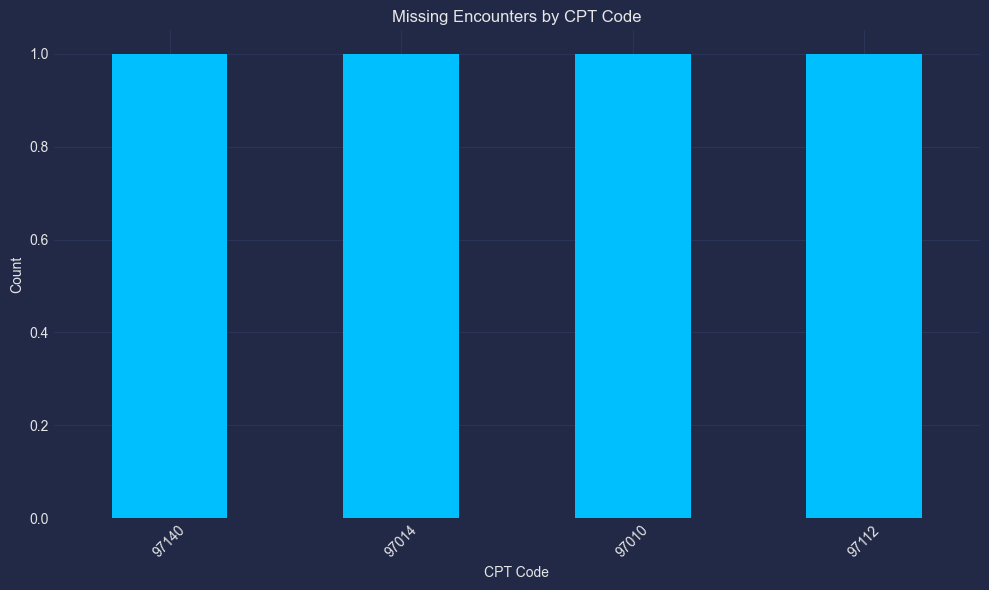

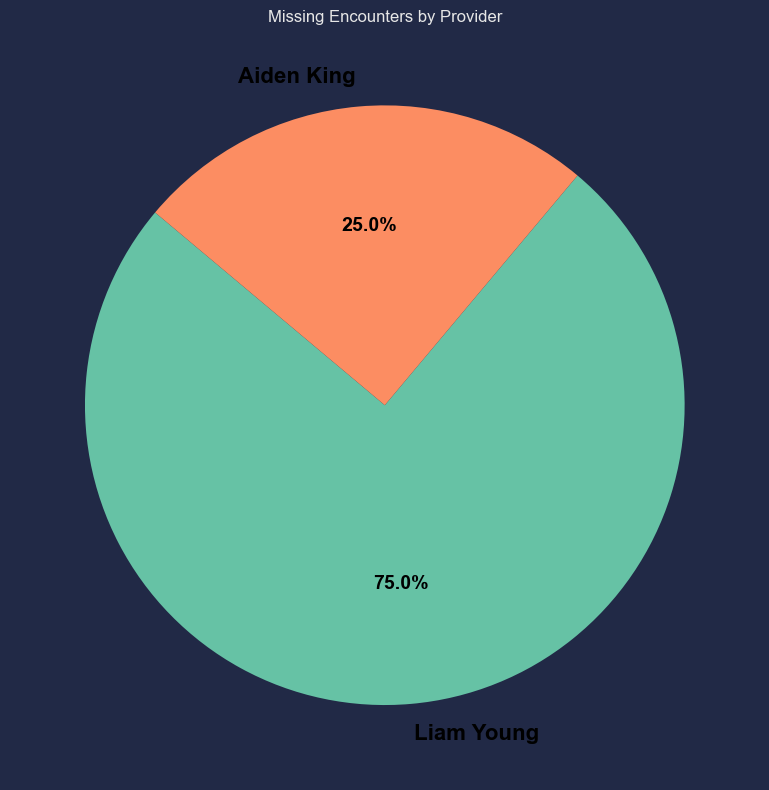

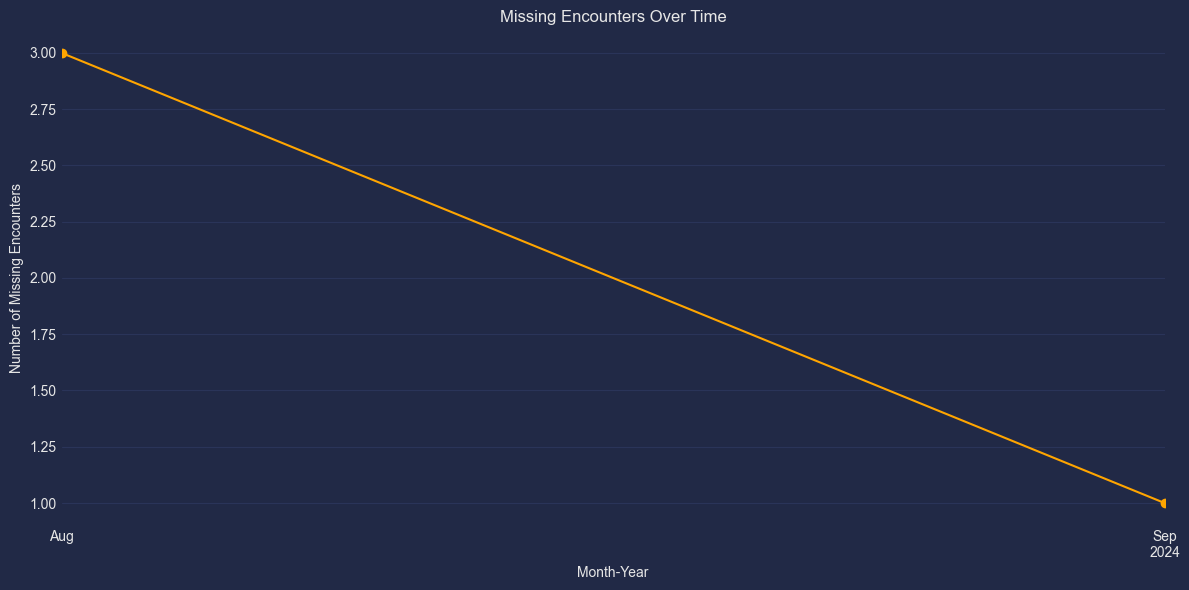

In [ ]:
# Find missing encounters: those in ER but not in SD_exploded
merged = ER.merge(
    SD_exploded,
    left_on=['Patient Name', 'Provider Name', 'Date of Service', 'CPT Code'],
    right_on=['Patient Name', 'Provider Name', 'from_date_range', 'cpt_codes'],
    how='left',
    indicator=True
)
missing_encounters = merged[merged['_merge'] == 'left_only'][['Patient Name', 'Provider Name', 'Date of Service', 'CPT Code']]

# Bar chart: Count of missing encounters by CPT Code
plt.figure(figsize=(10,6))
cpt_counts = missing_encounters['CPT Code'].value_counts()
ax = cpt_counts.plot(kind='bar', color='deepskyblue')
plt.title('Missing Encounters by CPT Code')
plt.xlabel('CPT Code')
plt.ylabel('Count')
plt.xticks(rotation=45)
mplcyberpunk.add_glow_effects(ax)
plt.tight_layout()
plt.show()

# Pie chart: Distribution of missing encounters by Provider
provider_counts = missing_encounters['Provider Name'].value_counts()
plt.figure(figsize=(8,8))
wedges, texts, autotexts = plt.pie(
    provider_counts,
    labels=provider_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=cm.Set2(range(len(provider_counts))),
    textprops={'color':'black', 'fontsize':14}
)
plt.setp(texts, size=16, weight="bold")
plt.setp(autotexts, size=14, weight="bold")
plt.title('Missing Encounters by Provider')
plt.tight_layout()
plt.show()

# Line chart: Missing encounters over time
monthly_missing = missing_encounters.groupby(missing_encounters['Date of Service'].dt.to_period('M')).size()
plt.figure(figsize=(12,6))
monthly_missing.plot(kind='line', marker='o', color='orange')
plt.title('Missing Encounters Over Time')
plt.xlabel('Month-Year')
plt.ylabel('Number of Missing Encounters')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Show the count of missing encounters found
print(f"Total missing encounters found: {len(missing_encounters)}")
